In [1]:
import faraway.datasets.air
import faraway.datasets.fat
import faraway.utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 2 Predicting Body Fat

In [2]:
fat = faraway.datasets.fat.load()
fat.head()

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


`brozek` is a calclulation of percent body fat from density

In [3]:
fat.insert(0, 'Intercept', 1)
x0 = fat.iloc[:, np.r_[0, 4:7, 9:19]].median()
pd.DataFrame(x0).T

,Intercept,age,weight,height,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1.0,43.0,176.5,70.0,38.0,99.65,90.95,99.3,59.0,38.5,22.8,32.05,28.7,18.3


In [4]:
lmod = smf.ols(
    'brozek ~ age + weight + height + neck + chest + abdom + hip'
    '+ thigh + knee + ankle + biceps + forearm + wrist',
    fat
).fit()

In [5]:
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.63
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           7.98e-64
Time:                        09:14:59   Log-Likelihood:                -698.96
No. Observations:                 252   AIC:                             1426.
Df Residuals:                     238   BIC:                             1475.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2925     16.070     -0.952      0.342     -46.950      16.365
age            0.0568      0.030      1.895      0.059      -0.002       0.116
weight        -0.0803      0.050     -1.620      0.107      -0.178       0.017
height        -0.0646      0.089     -0.726      0.468      -0.240       0.111
neck          -0.4375      0.215     -2.032      0.043      -0.862      -0.013
chest         -0.0236      0.092     -0.257      0.797      -0.205       0.157
abdom          0.8854      0.080     11.057      0.000       0.728       1.043
hip           -0.1984      0.135     -1.468      0.143      -0.465       0.068
thigh          0.2319      0.134      1.734      0.084      -0.032       0.495
knee          -0.0117      0.224     -0.052      0.958      -0.453       0.430
ankle          0.1635      0.205      0.797      0.426      -0.241       0.568
biceps         0.1528      0.159      0.964      0.336      -0.159       0.465
forearm        0.4305      0.184      2.334      0.020       0.067       0.794
wrist         -1.4765      0.496     -2.980      0.003      -2.453      -0.500
==============================================================================
Omnibus:                        4.232   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                2.743
Skew:                          -0.006   Prob(JB):                        0.254
Kurtosis:                       2.489   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
x0 @ lmod.params

17.493220100555554

In [7]:
# Equivalently
lmod.predict(x0)

0    17.49322
dtype: float64

In [8]:
lmod.get_prediction(x0)#.summary_frame()

PatsyError: Error evaluating factor: NameError: name 'age' is not defined
    brozek ~ age + weight + height + neck + chest + abdom + hip+ thigh + knee + ankle + biceps + forearm + wrist
             ^^^

In [9]:
x1 = fat.iloc[:, np.r_[0, 4:7, 9:19]].quantile(0.95)
pd.DataFrame(x1).T

,Intercept,age,weight,height,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0.95,1.0,67.0,225.65,74.5,41.845,116.34,110.76,112.125,68.545,42.645,25.445,37.2,31.745,19.8


In [10]:
lmod.get_prediction(x1).summary_frame()

PatsyError: Error evaluating factor: NameError: name 'age' is not defined
    brozek ~ age + weight + height + neck + chest + abdom + hip+ thigh + knee + ankle + biceps + forearm + wrist
             ^^^

### 3 Autoregression

In [11]:
air = faraway.datasets.air.load()
print(air.shape)
air.head()

(144, 2)


,pass,year
0,112,49.083333
1,118,49.166667
2,132,49.250000
3,129,49.333333
4,121,49.416667


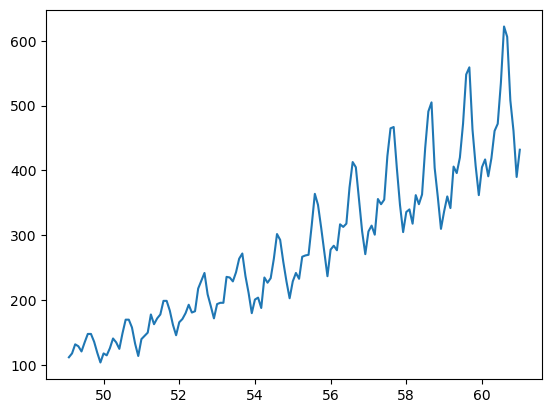

In [13]:
plt.plot(air.year, air['pass']);

In [21]:
X = pd.DataFrame({'Intercept': 1, 'year': air.year})
y = np.log(air['pass'])
lmod = sm.OLS(y, X).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pass   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1300.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           2.41e-73
Time:                        09:24:21   Log-Likelihood:                 80.794
No. Observations:                 144   AIC:                            -157.6
Df Residuals:                     142   BIC:                            -151.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0948      0.184     -5.935      0.000      -1.459      -0.730
year           0.1206      0.003     36.050      0.000       0.114       0.127
==============================================================================
Omnibus:                        3.750   Durbin-Watson:                   0.587
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.722
Skew:                           0.184   Prob(JB):                        0.256
Kurtosis:                       2.436   Cond. No.                         878.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

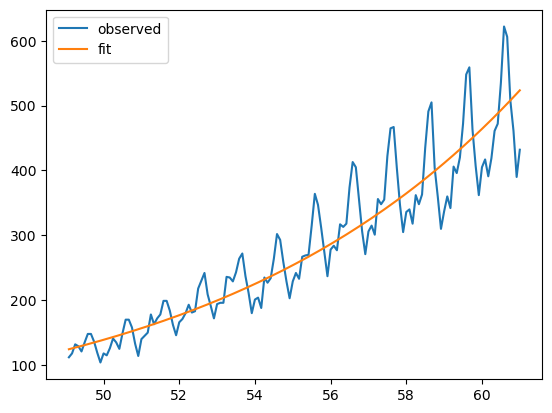

In [31]:
plt.plot(air.year, air['pass'], label='observed');
plt.plot(air.year, np.exp(lmod.predict()), label='fit')
plt.legend();

In [23]:
for lag in (1, 12, 13):
    air[f'lag{lag}'] = np.log(air['pass']).shift(lag)
airlag = air.dropna()

In [24]:
airlag.head()

,pass,year,lag1,lag12,lag13
13,126,50.166667,4.744932,4.770685,4.718499
14,141,50.250000,4.836282,4.882802,4.770685
15,135,50.333333,4.948760,4.859812,4.882802
16,125,50.416667,4.905275,4.795791,4.859812
17,149,50.500000,4.828314,4.905275,4.795791


In [25]:
X = airlag[['lag1', 'lag12', 'lag13']]
X.insert(0, 'Intercept', 1)
y = np.log(airlag['pass'])
armod = sm.OLS(y, X).fit()
armod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pass   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3892.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          9.50e-125
Time:                        09:24:38   Log-Likelihood:                 232.55
No. Observations:                 131   AIC:                            -457.1
Df Residuals:                     127   BIC:                            -445.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1385      0.054      2.583      0.011       0.032       0.245
lag1           0.6923      0.062     11.192      0.000       0.570       0.815
lag12          0.9215      0.035     26.532      0.000       0.853       0.990
lag13         -0.6321      0.068     -9.340      0.000      -0.766      -0.498
==============================================================================
Omnibus:                        4.849   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                5.148
Skew:                           0.254   Prob(JB):                       0.0762
Kurtosis:                       3.828   Cond. No.                         244.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

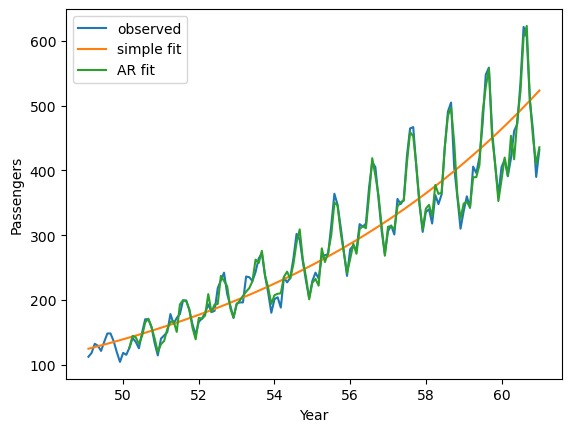

In [32]:
plt.plot(air.year, air['pass'], label='observed');
plt.plot(air.year, np.exp(lmod.predict()), label='simple fit')
plt.plot(airlag.year, np.exp(armod.predict()), label='AR fit')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Passengers');

In [29]:
z = np.log(air['pass'].iloc[[-1, -12, -13]]).values
z

array([6.06842559, 6.03308622, 6.00388707])

In [30]:
x0 = pd.DataFrame(
    {'const': 1, 'lag1': z[0], 'lag12': z[1], 'lag13': z[2]},
    index=[0])
x0

,const,lag1,lag12,lag13
0,1,6.068426,6.033086,6.003887


In [33]:
armod.get_prediction(x0).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6.103985,0.006375,6.09137,6.116601,6.020619,6.187351
